## Different mathematical models
1. Differential equation model 
2. State space model 
3. Transfer function (frequency domain) 

## Transfer functions (S-domain)
When dealing with a system in time domain, however, when analysing complex system with multiple components complexity arises. This complexity takes the form which requires *convolution* to add each system component (i.e. input function, plant, etc.). To avoid having to do convoluations the system can be transformed to the frequency domain through the Laplace transform. A nice property of this transformation is that system components becomes multiplicative avoiding nasty convulotions in time-domain; s-domain allows for generic algebra to be applied.


## Z-transforms
Once controller has been designed by transfer function, G(s), inputs to may not necessarily be applied in continuous time. Z-transform allows controls to be applied in real time.

Tales of note; T = sampling frequency (measured in seconds). 


## Goal:
Given plant and controller system $\frac{dc(t)}{dt} + 2 c(t) = r(t)$ and r(t)= 1(t) \[step function\], t \[ramp\] and $\frac{1}{2}t^2 \[parabolic\] simulate the system via difference equations. 

### Example 1. r(t)= 1(t) step function

1. Find transfer function (s-domain) of plant and inputs by taking Laplace transforms then solving for $\frac{C(s)}{R(s)}$ which yields the following transfer functions: <br>
Combined (Input + Plant): $\frac{1}{(s+2)}$ <br>
2. Find z-transform of $\frac{1}{s(s+2)}$ <br> 
Assuming a sample frequency, T=0.1 and using Zero-Order Hold method for transformation yields the following Z-transform. 
$$G(z) = \frac{0.09063 z^{-1} }{1 - 0.8187 z{^-1}}$$

3. Formulate into difference equations:
Setting $G(z)= \frac{Y(z)}{X(z)}$ and substituting yields: 

$$
\begin{align}
    G(z) = \frac{Y(z)}{X(z)} =& \frac{0.09063 z^{-1} }{1 - 0.8187 z{^-1}} \\
    Y(z)(1 - 0.8187 z{^-1}) =& 0.09063 X(z)z^{-1} \\
    & \text{ using } Y(z) z^{-n} = y(k-n) \text{ shift property of Z-transform yields difference equation:} \\
    y(k) = & 0.09063 x(k-1) + 0.8187 y(k-1) \\
\end{align}
$$
    


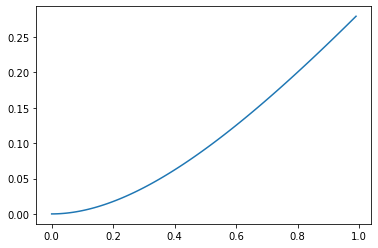

In [8]:
# continuous version for checking
import math
import matplotlib.pyplot as plt

# create range of on x domain 
T = 0.01
num_samples = 100
x = [i*T for i in range(num_samples)]

# 1. step function no
y = []
#for x_ in range(1,num_samples):
for t in x:
    # x_n = 1/(1 - math.exp(-2 * T) * y[x_ - 1])
    x_n = -1/4 * 1 + t/2 + 1/4* math.exp(-2*t)
    y.append(x_n)
    
plt.plot(x,y)

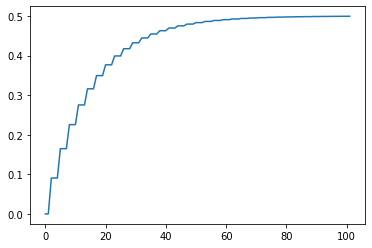

In [7]:
# discrete version
import math
import matplotlib.pyplot as plt

# create range of on x domain 
T = 0.1
num_samples = 100
n_t = [i*T for i in range(num_samples)]

# for a constant step response r(t) = 1(t)
r = 1
c = [0,0]


for index, n in enumerate(n_t):
    # c_t =  0.8187 c_{t-1} + 0.09063 r_{t-1} 
    c_t = 0.8187 * c[index - 1] + 0.09063  * 1 
    c.append(c_t)
    
plt.plot(c)